# Projected outcomes

This notebook contains the code we used to project outcomes under the 10x5 and 50x1 districting plans using demographic threshold inference model (see section 5 of the report).

In [14]:
import pandas
import numpy
from collections import namedtuple
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

## Projection model code

In [2]:
class ElectionSampler:
    cases = None
    threshold = None
    
    def decide_case(self, groups: pandas.Series):
        number_over_threshold = (groups > self.threshold).sum()
        return self.cases[number_over_threshold]

    def sample(self, groups: pandas.Series):
        """
        :param pandas.Series groups: a single row of a DataFrame with the percentages
            of each racial group in a ward.
        """
        outcomes, probabilities = self.decide_case(groups)
        outcome = random.choices(outcomes, weights=probabilities)[0]
        groups_from_highest_to_lowest = groups.sort_values(ascending=False).keys()
        result = zip(groups_from_highest_to_lowest, outcome)
        return result

In [3]:
Case = namedtuple("Case", ["outcomes", "probabilities"])

In [4]:
class TenByFiveSampler(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1)), (0.25, 0.6, 0.1, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6

class FiftyByOneSampler(ElectionSampler):
    cases = {
        1: Case(outcomes=((1,),), probabilities=(1,)),
        2: Case(((1,), (0, 1)), (0.9, 0.1)),
        3: Case(((1,), (0, 1), (0,0,1)), (0.8, 0.18, 0.02))
    }
    threshold = 0.25

In [5]:
def load_data(filename):
    df = pandas.read_csv(filename)
    data = pandas.DataFrame(
        {
            "step": df["step"],
            "ward": df["ward"],
            "White": df["NH_WHITE"] / df["TOTPOP"],
            "Black": df["NH_BLACK"] / df["TOTPOP"],
            "Hispanic": df["HISP"] / df["TOTPOP"],
            "Asian": df["NH_ASIAN"] / df["TOTPOP"],
        }
    )
    return data

## Generating the projections

In [7]:
data = load_data("../ensembles/prec50/results.csv")
outcomes_prec50 = pandas.DataFrame.from_records(random_sample(data, 100000, FiftyByOneSampler()))
outcomes_prec50.to_csv("./projection_50x1.csv")
outcomes.groupby(groups).size().to_csv("./projection_50x1_counts.csv", header=True)

In [ ]:
data = load_data("../ensembles/prec10/results.csv")
outcomes_prec10 = pandas.DataFrame.from_records(random_sample(data, 100000, FiftyByOneSampler()))
outcomes_prec10.to_csv("./projection_10x5.csv")
outcomes.groupby(groups).size().to_csv("./projection_10x5_counts.csv", header=True)

In [ ]:
data = load_data("../ensembles/ca10/results.csv")
outcomes_prec10ca = pandas.DataFrame.from_records(random_sample(data, 100000, FiftyByOneSampler()))
outcomes_prec10ca.to_csv("./projection_10x5_CA.csv")
outcomes.groupby(groups).size().to_csv("./projection_10x5_CA_counts.csv", header=True)

## Plotting the results

Here's an example plot of the projections we just made using the 50x1 ensemble.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B22D4C90B8>,
      dtype=object)

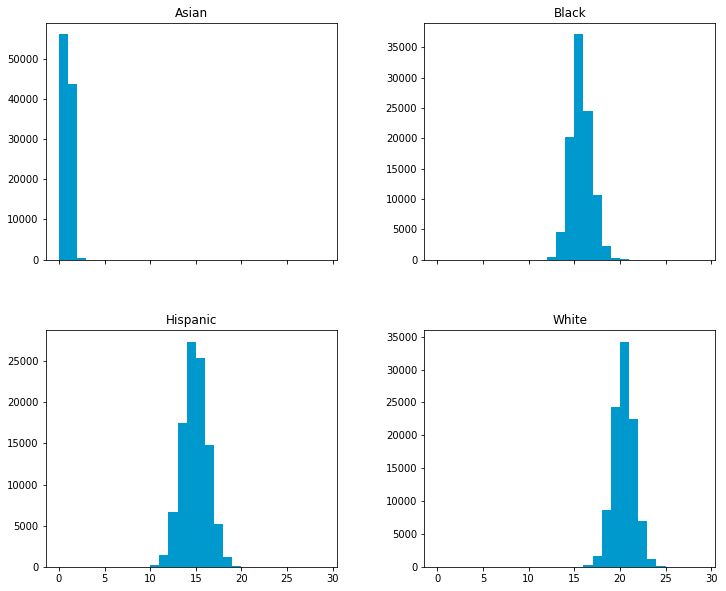

In [15]:
groups = ["Asian", "Black", "Hispanic", "White"]
outcomes_prec50[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))

## Statistics

We can use `pandas` to compute statistics for the projected outcomes:

In [16]:
outcomes_prec50.mean()

Asian        0.44428
Black       15.23303
Hispanic    14.39651
White       19.92618
dtype: float64